# Table of Contents
 <p><div class="lev1 toc-item"><a href="#import-Packages" data-toc-modified-id="import-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>import Packages</a></div><div class="lev2 toc-item"><a href="#H2O-init" data-toc-modified-id="H2O-init-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>H2O init</a></div><div class="lev2 toc-item"><a href="#import-xy_train,-x_test" data-toc-modified-id="import-xy_train,-x_test-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>import xy_train, x_test</a></div><div class="lev2 toc-item"><a href="#27-AUG-2017-dl_model" data-toc-modified-id="27-AUG-2017-dl_model-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>27-AUG-2017 dl_model</a></div><div class="lev3 toc-item"><a href="#Model-Details" data-toc-modified-id="Model-Details-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Model Details</a></div><div class="lev2 toc-item"><a href="#28-AUG-2017-dl_model_list-1" data-toc-modified-id="28-AUG-2017-dl_model_list-1-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>28-AUG-2017 dl_model_list 1</a></div><div class="lev3 toc-item"><a href="#split-the-data-3-ways:" data-toc-modified-id="split-the-data-3-ways:-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>split the data 3 ways:</a></div><div class="lev3 toc-item"><a href="#desicion" data-toc-modified-id="desicion-142"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>desicion</a></div><div class="lev2 toc-item"><a href="#28-AUG-2017-dl_model_list-2" data-toc-modified-id="28-AUG-2017-dl_model_list-2-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>28-AUG-2017 dl_model_list 2</a></div><div class="lev2 toc-item"><a href="#28-AUG-2017-dl_model_list-3" data-toc-modified-id="28-AUG-2017-dl_model_list-3-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>28-AUG-2017 dl_model_list 3</a></div><div class="lev3 toc-item"><a href="#30,40-nurons,-4,5-layers" data-toc-modified-id="30,40-nurons,-4,5-layers-161"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>30,40 nurons, 4,5 layers</a></div><div class="lev3 toc-item"><a href="#tests" data-toc-modified-id="tests-162"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>tests</a></div><div class="lev2 toc-item"><a href="#Predict-test_h2o-&amp;-combine" data-toc-modified-id="Predict-test_h2o-&amp;-combine-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Predict test_h2o &amp; combine</a></div><div class="lev2 toc-item"><a href="#Predict-x_test-&amp;-combine" data-toc-modified-id="Predict-x_test-&amp;-combine-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Predict x_test &amp; combine</a></div>

# import Packages

In [1]:
import h2o
import time,os

In [5]:
%matplotlib inline                         
#IMPORT ALL THE THINGS

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

## H2O init

In [3]:
h2o.init(max_mem_size = 20)            #uses all cores by default
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,7 mins 36 secs
H2O cluster version:,3.10.4.8
H2O cluster version age:,3 months and 6 days
H2O cluster name:,H2O_from_python_jethva_kxzc79
H2O cluster total nodes:,1
H2O cluster free memory:,16.87 Gb
H2O cluster total cores:,24
H2O cluster allowed cores:,24
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


## import xy_train, x_test

In [6]:
xy_tr = h2o.import_file(path = os.path.realpath("../daielee/xy_tr.csv"))
x_test  = h2o.import_file(path = os.path.realpath("../daielee/x_test.csv"))

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [7]:
xy_tr_df = xy_tr.as_data_frame(use_pandas=True)
x_test_df = x_test.as_data_frame(use_pandas=True)

In [8]:
print (xy_tr_df.shape,x_test_df.shapepe)

(90275, 58) (2985217, 57)


## 27-AUG-2017 dl_model

### Model Details


* dl_model = H2ODeepLearningEstimator(epochs=1000)
* dl_model.train(X, y, xy_tr)

=============
* H2ODeepLearningEstimator :  Deep Learning
* Model Key:  DeepLearning_model_python_1503841734286_1


* ModelMetricsRegression: deeplearning
* ** Reported on train data. **

* MSE: 0.02257823450695032
* RMSE: 0.15026055539279204
* MAE: 0.06853673758752012
* RMSLE: NaN
* Mean Residual Deviance: 0.02257823450695032

In [10]:
X = xy_tr.col_names[0:57]
y = xy_tr.col_names[57]
dl_model = H2ODeepLearningEstimator(epochs=1000)
dl_model.train(X, y, xy_tr)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [11]:
dl_model.summary

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1503841734286_1


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.02257823450695032
RMSE: 0.15026055539279204
MAE: 0.06853673758752012
RMSLE: NaN
Mean Residual Deviance: 0.02257823450695032
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae
,2017-08-27 20:36:08,0.000 sec,None,0.0,0,0.0,nan,nan,nan
,2017-08-27 20:36:14,6.673 sec,17585 obs/sec,1.1068513,1,99921.0,0.1707692,0.0291621,0.0716218
,2017-08-27 20:36:21,13.935 sec,23280 obs/sec,3.3204985,3,299758.0,0.1693846,0.0286912,0.0699298
,2017-08-27 20:36:28,20.592 sec,25684 obs/sec,5.5341567,5,499596.0,0.1688644,0.0285152,0.0703825
,2017-08-27 20:36:34,26.864 sec,27280 obs/sec,7.7537413,7,699969.0,0.1689997,0.0285609,0.0703055
---,---,---,---,---,---,---,---,---,---
,2017-08-27 20:45:43,9 min 35.269 sec,38494 obs/sec,241.5156134,218,21802822.0000000,0.1532783,0.0234942,0.0712851
,2017-08-27 20:45:50,9 min 42.698 sec,38522 obs/sec,244.8331986,221,22102317.0000000,0.1509789,0.0227946,0.0695887
,2017-08-27 20:45:55,9 min 47.743 sec,38536 obs/sec,247.0484520,223,22302299.0000000,0.1519738,0.0230960,0.0705504
,2017-08-27 20:46:00,9 min 52.873 sec,38544 obs/sec,249.2637164,225,22502282.0000000,0.1520505,0.0231193,0.0696316



See the whole table with table.as_data_frame()


<bound method ModelBase.summary of >

In [14]:
sh = dl_model.score_history()
sh = pd.DataFrame(sh)
print(sh.columns)

Index(['', 'timestamp', 'duration', 'training_speed', 'epochs', 'iterations',
       'samples', 'training_rmse', 'training_deviance', 'training_mae'],
      dtype='object')


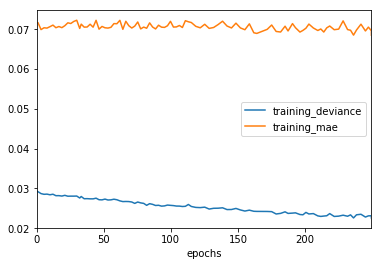

In [16]:
sh.plot(x='epochs',y = ['training_deviance', 'training_mae'])

In [20]:
dl_model.default_params

{'activation': 'Rectifier',
 'adaptive_rate': True,
 'autoencoder': False,
 'average_activation': 0.0,
 'balance_classes': False,
 'categorical_encoding': 'AUTO',
 'checkpoint': None,
 'class_sampling_factors': None,
 'classification_stop': 0.0,
 'col_major': False,
 'diagnostics': True,
 'distribution': 'AUTO',
 'elastic_averaging': False,
 'elastic_averaging_moving_rate': 0.9,
 'elastic_averaging_regularization': 0.001,
 'epochs': 10.0,
 'epsilon': 1e-08,
 'export_weights_and_biases': False,
 'fast_mode': True,
 'fold_assignment': 'AUTO',
 'fold_column': None,
 'force_load_balance': True,
 'hidden': [200, 200],
 'hidden_dropout_ratios': None,
 'huber_alpha': 0.9,
 'ignore_const_cols': True,
 'ignored_columns': None,
 'initial_biases': None,
 'initial_weight_distribution': 'UniformAdaptive',
 'initial_weight_scale': 1.0,
 'initial_weights': None,
 'input_dropout_ratio': 0.0,
 'keep_cross_validation_fold_assignment': False,
 'keep_cross_validation_predictions': False,
 'l1': 0.0,
 'l2'

In [38]:
 dl_model.model_performance(test_data=xy_tr)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.025000241400573237
RMSE: 0.1581146463822161
MAE: 0.06741851411740078
RMSLE: NaN
Mean Residual Deviance: 0.025000241400573237


In [39]:
pd.DataFrame(dl_model.varimp())

""


In [40]:
y_test = dl_model.predict(test_data=x_test)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [41]:
print(y_test.shape)

(2985217, 1)


## 28-AUG-2017 dl_model_list 1

In [103]:
nuron_cnts = [40,80,160]
layer_cnts = [1,2,3,4,5]
acts = ["Tanh","Maxout","Rectifier","RectifierWithDropout"]
models_list = []
m_names_list = []
i = 0
# N 3 * L 5 * A 4 = 60n 
for act in acts:
    for layer_cnt in layer_cnts:
        for nuron_cnt in nuron_cnts:
            m_names_list.append("N:"+str(nuron_cnt)+"L:"+str(layer_cnt)+"A:"+act)
            print(m_names_list[i])
            models_list.append(H2ODeepLearningEstimator(
                model_id=m_names_list[i],
                hidden=[nuron_cnt]*layer_cnt,            # more hidden layers -> more complex interactions
                activation = act,
                epochs=10,                       # to keep it short enough
                score_validation_samples=10000,
                overwrite_with_best_model=True,
                adaptive_rate=True,
                l1=0.00001,                      # add some L1/L2 regularization
                l2=0.00001,
                max_w2=10.0                        # helps stability for Rectifier
            ))
            
            models_list[i].train(x=X,y=y,training_frame=xy_tr,
                  validation_frame=xy_tr)
            i+=1

deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build pro

In [104]:
for i in range(0,639): #range(len(models_list)-1):
    try:
        sh = models_list[i].score_history()
        sh = pd.DataFrame(sh)
        perform = sh['validation_deviance'].tolist()[-1]
        print(models_list[i].model_id,end=" ")
        print(perform)
    except:
        print(end="")

N:40L:1A:Tanh 0.02191104025818047
N:80L:1A:Tanh 0.02866460132997793
N:160L:1A:Tanh 0.02738745782618937
N:40L:2A:Tanh 0.027354476515048527
N:80L:2A:Tanh 0.0213912611589249
N:160L:2A:Tanh 0.03003707631564074
N:40L:3A:Tanh 0.025110226659536748
N:80L:3A:Tanh 0.028280990468011215
N:160L:3A:Tanh 0.024612255460352443
N:40L:4A:Tanh 0.03053287072861051
N:80L:4A:Tanh 0.02361192080682827
N:160L:4A:Tanh 0.026893795364736805
N:40L:5A:Tanh 0.027192312105420283
N:80L:5A:Tanh 0.02680966175827571
N:160L:5A:Tanh 0.025812352247345866
N:40L:1A:Maxout 0.02052945142692426
N:80L:1A:Maxout 0.023988878572638126
N:160L:1A:Maxout 0.023132544480644914
N:40L:2A:Maxout 0.026802401674975062
N:80L:2A:Maxout 0.02556542374159979
N:160L:2A:Maxout 0.027736017276626588
N:40L:3A:Maxout 0.02521875009843506
N:80L:3A:Maxout 0.03075028538701201
N:160L:3A:Maxout 0.023427097603774816
N:40L:4A:Maxout 0.026294584554501673
N:80L:4A:Maxout 0.027574321628114656
N:160L:4A:Maxout 0.02969554448548389
N:40L:5A:Maxout 0.029599484325346585

### split the data 3 ways:  
1. 60% for training  
2. 20% for validation (hyper parameter tuning)  
3. 20% for final testing  
 
1.  We will train a data set on one set and use the others to test the validity of the model by ensuring that it can predict accurately on data the model has not been shown.   
2.  The second set will be used for validation most of the time.  
3.  The third set will be withheld until the end, to ensure that our validation accuracy is consistent with data we have never seen during the iterative process. 

### desicion
Use Rect-dropout

In [181]:
train_h2o, valid_h2o, test_h2o = xy_tr.split_frame([0.6, 0.2], seed=1234)

## 28-AUG-2017 dl_model_list 2

In [112]:
nuron_cnts = [40,80,160]
layer_cnts = [1,2,3,4,5]
acts = ["RectifierWithDropout"] #"Tanh","Maxout","Rectifier",
models_list = []
m_names_list = []
time_tkn_wall =[]
time_tkn_clk=[]
i = 0
# N 3 * L 5 * A 1 = 15n 
for act in acts:
    for layer_cnt in layer_cnts:
        for nuron_cnt in nuron_cnts:
            m_names_list.append("N: "+str(nuron_cnt)+" L: "+str(layer_cnt)+" A: "+act)
            print(m_names_list[i])
            models_list.append(H2ODeepLearningEstimator(
                model_id=m_names_list[i],
                hidden=[nuron_cnt]*layer_cnt,            # more hidden layers -> more complex interactions
                activation = act,
                epochs=10,                       # to keep it short enough
                score_validation_samples=10000,
                overwrite_with_best_model=True,
                adaptive_rate=True,
                l1=0.00001,                      # add some L1/L2 regularization
                l2=0.00001,
                max_w2=10.0                        # helps stability for Rectifier
            ))
            str_time_clk = time.clock()
            str_time_wall = time.time()
            
            models_list[i].train(x=X,y=y,training_frame=train,
                  validation_frame=valid)
            time_tkn_clk.append(time.clock()-str_time_clk)
            time_tkn_wall.append(time.time()-str_time_wall)
            
            i+=1

N: 40 L: 1 A: RectifierWithDropout
deeplearning Model Build progress: |██████████████████████████████████████| 100%
N: 80 L: 1 A: RectifierWithDropout
deeplearning Model Build progress: |██████████████████████████████████████| 100%
N: 160 L: 1 A: RectifierWithDropout
deeplearning Model Build progress: |██████████████████████████████████████| 100%
N: 40 L: 2 A: RectifierWithDropout
deeplearning Model Build progress: |██████████████████████████████████████| 100%
N: 80 L: 2 A: RectifierWithDropout
deeplearning Model Build progress: |██████████████████████████████████████| 100%
N: 160 L: 2 A: RectifierWithDropout
deeplearning Model Build progress: |██████████████████████████████████████| 100%
N: 40 L: 3 A: RectifierWithDropout
deeplearning Model Build progress: |██████████████████████████████████████| 100%
N: 80 L: 3 A: RectifierWithDropout
deeplearning Model Build progress: |██████████████████████████████████████| 100%
N: 160 L: 3 A: RectifierWithDropout
deeplearning Model Build progress:

time.time() shows that the wall-clock time has passed approximately one second while time.clock() shows the CPU time spent on the current process is less than 1 microsecond. time.clock() has a much higher precision than time.time().

In [115]:
for i in range(len(models_list)-1):
    try:
        sh = models_list[i].score_history()
        sh = pd.DataFrame(sh)
        perform = sh['validation_deviance'].tolist()[-1]
        print(models_list[i].model_id,end=" ")
        print(" clk "+str(time_tkn_clk[i])+" wall "+str(time_tkn_wall[i]),end=" ")
        print(perform)
    except:
        print(end="")

N: 40 L: 1 A: RectifierWithDropout  clk 0.27000000000003865 wall 3.249885320663452 0.023469934690956554
N: 80 L: 1 A: RectifierWithDropout  clk 0.3100000000000023 wall 4.686337471008301 0.025744111295793928
N: 160 L: 1 A: RectifierWithDropout  clk 0.339999999999975 wall 7.4652464389801025 0.02426045842498989
N: 40 L: 2 A: RectifierWithDropout  clk 0.27000000000003865 wall 3.916215419769287 0.026011432819666936
N: 80 L: 2 A: RectifierWithDropout  clk 0.3299999999999841 wall 6.651781797409058 0.02078551153846703
N: 160 L: 2 A: RectifierWithDropout  clk 0.35000000000002274 wall 10.531349658966064 0.023994181648258305
N: 40 L: 3 A: RectifierWithDropout  clk 0.2899999999999636 wall 4.695176839828491 0.025275593214375437
N: 80 L: 3 A: RectifierWithDropout  clk 0.34000000000003183 wall 8.670188903808594 0.02558111504808703
N: 160 L: 3 A: RectifierWithDropout  clk 0.4900000000000091 wall 20.546206951141357 0.021774404657216598
N: 40 L: 4 A: RectifierWithDropout  clk 0.3199999999999932 wall 5.5

## 28-AUG-2017 dl_model_list 3
### 30,40 nurons, 4,5 layers

In [172]:
nuron_cnts = [30,40,50]
layer_cnts = [4,5]
acts = ["RectifierWithDropout"] #"Tanh","Maxout","Rectifier",
dout=0.5
models_list = []
m_names_list = []
time_tkn_wall =[]
time_tkn_clk=[]

i = 0
# N 1 * L 10 * A 1 = 10n 
for act in acts:
    for layer_cnt in layer_cnts:
        for nuron_cnt in nuron_cnts:
            m_names_list.append("N: "+str(nuron_cnt)+" L: "+str(layer_cnt)+" A: "+act)
            print(m_names_list[i])
            models_list.append(H2ODeepLearningEstimator(
                model_id=m_names_list[i],
                hidden=[nuron_cnt]*layer_cnt,            # more hidden layers -> more complex interactions
                hidden_dropout_ratios=[dout]*layer_cnt,
                activation = act,
                epochs=500,                       # to keep it short enough
                train_samples_per_iteration=300,
                score_validation_samples=10000,
                loss="absolute",
                overwrite_with_best_model=True,
                adaptive_rate=True,
                l1=0.00001,                      # add some L1/L2 regularization
                l2=0.0001,
                max_w2=10.0,                        # helps stability for Rectifier
                variable_importances=True
            ))
            str_time_clk = time.clock()
            str_time_wall = time.time()
            
            models_list[i].train(x=X,y=y,training_frame=train,
                  validation_frame=valid)
            time_tkn_clk.append(time.clock()-str_time_clk)
            time_tkn_wall.append(time.time()-str_time_wall)
            
            i+=1

N: 30 L: 4 A: RectifierWithDropout
deeplearning Model Build progress: |██████████████████████████████████████| 100%
N: 40 L: 4 A: RectifierWithDropout
deeplearning Model Build progress: |██████████████████████████████████████| 100%
N: 50 L: 4 A: RectifierWithDropout
deeplearning Model Build progress: |██████████████████████████████████████| 100%
N: 30 L: 5 A: RectifierWithDropout
deeplearning Model Build progress: |██████████████████████████████████████| 100%
N: 40 L: 5 A: RectifierWithDropout
deeplearning Model Build progress: |██████████████████████████████████████| 100%
N: 50 L: 5 A: RectifierWithDropout
deeplearning Model Build progress: |██████████████████████████████████████| 100%


### tests

In [142]:
dl_pref=dl_model.model_performance(test_data=test) 

In [ ]:
dl_model.mean

In [155]:
    dl_pref.mae()

0.06796546374064724

In [163]:
train.shape
models_list[0].model_id

'N: 30 L: 4 A: RectifierWithDropout'

N: 30 L: 4 A: RectifierWithDropout clk 0.41	wall 0.85	tr 0.070206	val 0.067136	ts 0.068964
N: 40 L: 4 A: RectifierWithDropout clk 0.38	wall 0.76	tr 0.066569	val 0.066725	ts 0.068954
N: 50 L: 4 A: RectifierWithDropout clk 0.47	wall 1.02	tr 0.065506	val 0.066612	ts 0.068913
N: 30 L: 5 A: RectifierWithDropout clk 0.38	wall 0.77	tr 0.067466	val 0.066732	ts 0.069265
N: 40 L: 5 A: RectifierWithDropout clk 0.4	wall 0.84	tr 0.066973	val 0.067577	ts 0.069282
N: 50 L: 5 A: RectifierWithDropout clk 0.43	wall 0.77	tr 0.067525	val 0.06719	ts 0.06935


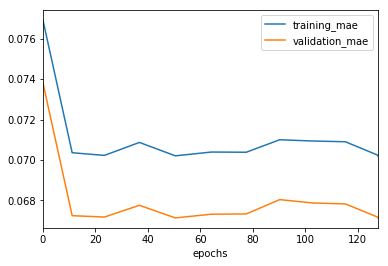

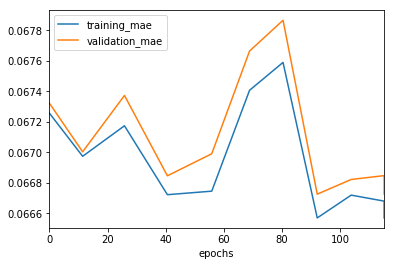

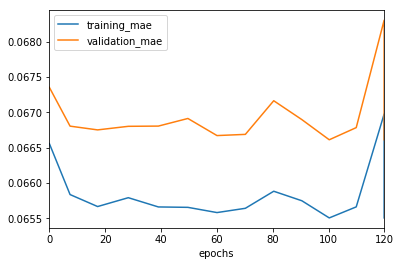

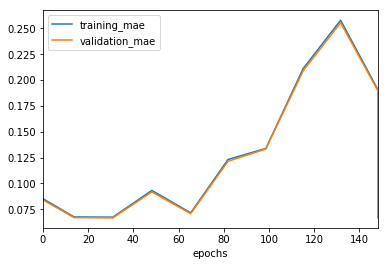

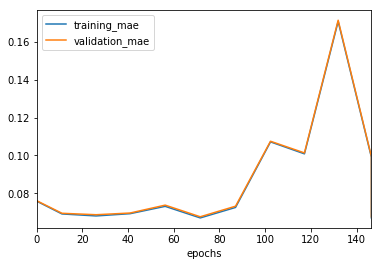

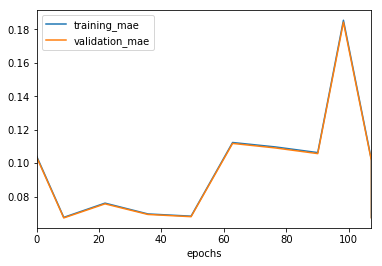

In [173]:
for i in range(len(models_list)):
    try:
        sh = models_list[i].score_history()
        sh = pd.DataFrame(sh)
        sh.plot(x='epochs',y = ['training_mae', 'validation_mae'])
        tr_perform = sh['training_mae'].tolist()[-1]
        val_perform = sh['validation_mae'].tolist()[-1]
        ts_perform= models_list[i].model_performance(test_data=test).mae() 
        print(models_list[i].model_id,end=" ")
        print("clk "+str(round(time_tkn_clk[i],2))+"\twall "+str(round(time_tkn_wall[i]/60,2)),end="\t")
        print(
            "tr " + str(round(tr_perform,6)) +"\tval " + str(round(val_perform,6)) + "\tts " + str(round(ts_perform,6))
        )
    except:
        print(end="")

## Predict test_h2o & combine

## Predict x_test & combine

In [174]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import gc
from sklearn.linear_model import LinearRegression
import random
import datetime as dt

/storage/users/jethva/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [175]:
np.random.seed(17)
random.seed(17)

train = pd.read_csv("../input/train_2016_v2.csv", parse_dates=["transactiondate"])
properties = pd.read_csv("../input/properties_2016.csv")
submission = pd.read_csv("../input/sample_submission.csv")
print(len(train),len(properties),len(submission))


/storage/users/jethva/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


90275 2985217 2985217


In [176]:
def get_features(df):
    df["transactiondate"] = pd.to_datetime(df["transactiondate"])
    df["transactiondate_year"] = df["transactiondate"].dt.year
    df["transactiondate_month"] = df["transactiondate"].dt.month
    df['transactiondate'] = df['transactiondate'].dt.quarter
    df = df.fillna(-1.0)
    return df

def MAE(y, ypred):
    #logerror=log(Zestimate)−log(SalePrice)
    return np.sum([abs(y[i]-ypred[i]) for i in range(len(y))]) / len(y)

In [177]:

train = pd.merge(train, properties, how='left', on='parcelid')
y = train['logerror'].values
test = pd.merge(submission, properties, how='left', left_on='ParcelId', right_on='parcelid')
properties = [] #memory

exc = [train.columns[c] for c in range(len(train.columns)) if train.dtypes[c] == 'O'] + ['logerror','parcelid']
col = [c for c in train.columns if c not in exc]


In [178]:
train = get_features(train[col])
test['transactiondate'] = '2016-01-01' #should use the most common training date
test = get_features(test[col])


/storage/users/jethva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/storage/users/jethva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/storage/users/jethva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [179]:
reg = LinearRegression(n_jobs=-1)
reg.fit(train, y); print('fit...')
print(MAE(y, reg.predict(train)))
train = [];  y = [] #memory

test_dates = ['2016-10-01','2016-11-01','2016-12-01','2017-10-01','2017-11-01','2017-12-01']
test_columns = ['201610','201611','201612','201710','201711','201712']


fit...
0.068370083368


In [187]:
pred0 = models_list[1].predict(test_data=x_test).as_data_frame(use_pandas=True)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [188]:
pred0.head(n=5)

,predict
0,0.001469
1,0.000359
2,0.259057
3,0.030629
4,0.025123


In [189]:
OLS_WEIGHT = 0.0856


print( "\nPredicting with OLS and combining with XGB/LGB/baseline predicitons: ..." )
for i in range(len(test_dates)):
    test['transactiondate'] = test_dates[i]
    pred = OLS_WEIGHT * reg.predict(get_features(test)) + (1-OLS_WEIGHT)*pred0.values[:,0]
    submission[test_columns[i]] = [float(format(x, '.4f')) for x in pred]
    print('predict...', i)

print( "\nCombined XGB/LGB/baseline/OLS predictions:" )
print( submission.head() )



Predicting with OLS and combining with XGB/LGB/baseline predicitons: ...
predict... 0
predict... 1
predict... 2
predict... 3
predict... 4
predict... 5

Combined XGB/LGB/baseline/OLS predictions:
   ParcelId  201610  201611  201612  201710  201711  201712
0  10754147 -0.0015 -0.0015 -0.0015 -0.0015 -0.0015 -0.0015
1  10759547 -0.0030 -0.0030 -0.0030 -0.0030 -0.0030 -0.0030
2  10843547  0.2924  0.2924  0.2924  0.2924  0.2924  0.2924
3  10859147  0.0313  0.0313  0.0313  0.0313  0.0313  0.0313
4  10879947  0.0256  0.0256  0.0255  0.0256  0.0256  0.0255


In [190]:
from datetime import datetime 
submission.to_csv('sub{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)


In [ ]:
h2o.model.regression.h2o_mean_absolute_error(y_actual=,y_predicted=)